<div style="text-align: left;" role="presentation">
<h1 role="presentation"><strong><span role="presentation">Lecci&oacute;n 10 Viernes 22 de Mayo</span></strong></h1>

## Continuacion de la leccion 9

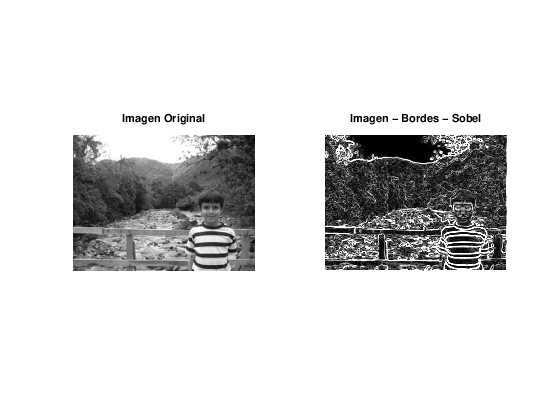

In [1]:
% Ejemplo de convolucion en imagenes
clc; clear;
pkg load image

A = imread('files/child.jpg');

subplot(1, 2, 1);
imshow(A);
title('Imagen Original');

% Crea matriz B
B1 = [-1 -2 -1; 0 0 0; 1 2 1]; % Detectar bordes horizontales (Operador de Sobel)
B2 = [-1 0 1; -2 0 2; -1 0 1]; % Detectar bordes verticales (Operador de Sobel)


A = double(A);

D1 = conv2(A, B1); % Convolucion A y B
D2 = conv2(A, B2); % Convolucion A y B

E = sqrt(D1.^2 + D2.^2);

[m, n] = size(A);
E = uint8(E(2 : m + 1, 2: n + 1));

subplot(1, 2, 2);
imshow(E);
title('Imagen - Bordes - Sobel');

## Filtros en el dominio espacial

* Se refiere al plano de l imagen original. Los metodos se basan directamente en la manipulacion de los pixeles de la imagen.

* Las transformaciones vistas anteriormente:
    * Operaciones Geometricas.
    * Transformaciones lineales y no lineales
    * uso de histogramas
    * Convolucion
    
* Son ejemplis de metodos aplicados en el dominio espacial.

* En esta parte del curso veremos un conjunto de metodos llamados filtros, que permiten modificar una imagen.

* Se entendera el concepto de filtro a un operacion (mayormente convolucion) que se aplica a una imagen $A$ con una matriz $B$ llamada mascara

### Clasificacion de filtros

#### 1. Filtro paso bajos:

* Atenuar los componentes de alta frecuencia (detalles finos) y preservar componentes de baja frecuencia (detalles gruesos).

* Sea $A\in\mathbb{R}^{m\times n}$ una imagen a escala de grises.
##### 1. Filtro Promedio:
    
    $A\ast B$ da como resultado la imagen filtrada.
    
* **NOTA:** 
    * Se puede generar otras mascara cuyo promedio de las entradas sea 1.
    * Se pueden crear matrices de tamaño diferente a $3\times3$ eso si, la suma de las entradas debe ser 1

##### 2. Filtro Gaussiano
* Sea $B\in\mathbb{R}^{m\times n}$, donde


$$B_{i,j} = e^{\frac{-(i^{2} + j^{2})}{2\sigma^{2} }}, \sigma \epsilon \mathbb{R}$$

    
* La mascara $B$ se crea a partir de una funcion gaussiana de 3 dimensiones. 
* El parametro teta controla la forma general de la curva.
* Un ejemplo de aproximacion de $B\in\mathbb{R}^{m\times n}$

$$B=\frac{1}{10} \cdot \begin{bmatrix} 1 & 2 & 1\\ 2& 4 & 2\\ 1& 2 & 1\end{bmatrix}$$

El resultado de la imagen filtrada es $A \ast B$  

#### 3. Filtro de la Media:

* Este es un filtro particular, porque no se aplica convolución. Entonces se le conoce como un filtro no lineal.

* Este filtro ordena los valores del pixel dentro de un vecindario encontrando el valor medio, y reemplazando el valor del pixel original con la mediana de este vecinadrio.

* Por ejemplo, considere el siguiente bloque

$$\begin{bmatrix} 9 & 12 & 0\\ 5 & 4 & 9\\ 8 & 10 & 7\end{bmatrix}$$

* Deseamos cambiar el valor de la entrada central con el valor medio de todo el bloque, por lo tanto se siguen los siguientes pasos:
    - Ordenar, de menor a mayor, los valores del bloque. En este caso $0, 4, 5, 7, 8, 9, 10, 12$
    - Calcular la mediana. En este caso es 8
    - Sustituir el valor central del pixel con la mediana, es decir 8

$$\begin{bmatrix}9 & 12 & 0\\ 5 & 8 & 9\\ 8 & 10 & 7\end{bmatrix}$$

* **Nota:** Este tipo de filtros se utilizan para limpiar una imagen con ruido "sal y pimienta"


In [2]:
%Tarea Implementar el filtro B2%